In [2]:
import networkx as nx
from smart_open import open
import ujson
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS
import os
from xenosite.fragment.remap import serialize_and_remap
from rdkit.Chem.rdFMCS import FindMCS

import ast
from xenopict import Xenopict
import xenopict.magic

from rdkit.Chem import rdDepictor
import rdkit.Chem.rdDepictor 
from rdkit.Chem.TemplateAlign import AlignMolToTemplate2D

import copy
import tqdm
from rdkit import Chem
from typing import NamedTuple, Callable

import smart_open
import pickle
from collections import defaultdict

import algorithmx
from random import randint

from pyvis.network import Network
import numpy as np

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addStereoAnnotation = True

In [2]:
# Reactivity data 
with open(os.environ["FRAGMENT_DATA_DIR"] + '/bioact_data.json') as f:
    SOMS = ujson.load(f)


for mol in tqdm.tqdm(SOMS["data"]):
    rids = mol['rid']

    try:
        serial, rids = serialize_and_remap(mol['smiles'], rids)
    except:
        continue
    
    mol['smiles'] = serial.string
    mol['rid'] = rids

100%|██████████| 1301/1301 [00:00<00:00, 4597.27it/s]


In [327]:
import gzip
import pickle

with gzip.open('network.pkl.gz', 'rb') as f:
    net = pickle.load(f)

net.to_pandas()

count  marked_count  \
frag                                                                         
C-C(-C)-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                1.153846      1.153846   
C-C(-C)-C1=C-C-C=C(-C(-C)-C)-C-1                    1.166667      0.000000   
C-C-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                    1.250000      1.250000   
C-C-C1=C-C(=C)-C=C(-C-1=O)-C(-C)(-C)-C              1.142857      1.142857   
C-C-C1=C-C-C=C(-C-1=O)-C(-C)(-C)-C                  1.153846      0.000000   
...                                                      ...           ...   
C-c1:c:c:c:c:c:1-C-N-c1:c:c:c2:s:c(-C-O-S(-O)(=...  1.000000      1.000000   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(-O)(=O)=O...  1.000000      1.000000   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(=O)=O):n:...  1.000000      1.000000   
Br-c1:c:c:c(-C(=O)-N-c2:c:c:c3:s:c(-C-O-S-O):n:...  1.000000      0.000000   
Br-c1:c:c:c:c(-Br):c:1-O                            1.000000      1.000000   

                                                    n_mol  n_atom  n_mark  \
frag                                                                        
C-C(-C)-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                    1      16       1   
C-C(-C)-C1=C-C-C=C(-C(-C)-C)-C-1                        1      16       1   
C-C-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                        1      16       1   
C-C-C1=C-C(=C)-C=C(-C-1=O)-C(-C)(-C)-C                  1      16       1   
C-C-C1=C-C-C=C(-C-1=O)-C(-C)(-C)-C                      1      16       1   
...                                                   ...     ...     ...   
C-c1:c:c:c:c:c:1-C-N-c1:c:c:c2:s:c(-C-O-S(-O)(=...      1      26       1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(-O)(=O)=O...      1      26       1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(=O)=O):n:...      1      26       1   
Br-c1:c:c:c(-C(=O)-N-c2:c:c:c3:s:c(-C-O-S-O):n:...      1      26       1   
Br-c1:c:c:c:c(-Br):c:1-O                                1       9       1   

                                                    n_cover  n_mark_cover  \
frag                                                                        
C-C(-C)-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                     15             1   
C-C(-C)-C1=C-C-C=C(-C(-C)-C)-C-1                         14             0   
C-C-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                         15             1   
C-C-C1=C-C(=C)-C=C(-C-1=O)-C(-C)(-C)-C                   16             1   
C-C-C1=C-C-C=C(-C-1=O)-C(-C)(-C)-C                       15             0   
...                                                     ...           ...   
C-c1:c:c:c:c:c:1-C-N-c1:c:c:c2:s:c(-C-O-S(-O)(=...       24             1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(-O)(=O)=O...       24             1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(=O)=O):n:...       24             1   
Br-c1:c:c:c(-C(=O)-N-c2:c:c:c3:s:c(-C-O-S-O):n:...       24             0   
Br-c1:c:c:c:c(-Br):c:1-O                                  9             1   

                                                         exp  obs  \
frag                                                                
C-C(-C)-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                0.937500    1   
C-C(-C)-C1=C-C-C=C(-C(-C)-C)-C-1                    0.875000    0   
C-C-C1-C-C(=C-C(=C)-C=1)-C(-C)-C                    0.937500    1   
C-C-C1=C-C(=C)-C=C(-C-1=O)-C(-C)(-C)-C              1.000000    1   
C-C-C1=C-C-C=C(-C-1=O)-C(-C)(-C)-C                  0.937500    0   
...                                                      ...  ...   
C-c1:c:c:c:c:c:1-C-N-c1:c:c:c2:s:c(-C-O-S(-O)(=...  0.923077    1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(-O)(=O)=O...  0.923077    1   
Br-c1:c:c:c(-C-N-c2:c:c:c3:s:c(-C-O-S(=O)=O):n:...  0.923077    1   
Br-c1:c:c:c(-C(=O)-N-c2:c:c:c3:s:c(-C-O-S-O):n:...  0.923077    0   
Br-c1:c:c:c:c(-Br):c:1-O                            1.000000    1   

                                                                                           marked_ids  \
frag                             

In [293]:
pd.DataFrame(SOMS['data'])

smiles       rid   level
0                              O=C(Br)C(F)(F)F      (1,)     [0]
1                       CC(C)C(Br)C(=O)NC(N)=O      (3,)     [0]
2                             CC(C)C(Br)C(=O)O      (3,)     [0]
3     BrC1=CC(Br)=C(Oc2cc(Br)c(Br)cc2Br)C2OC12  (16, 18)  [0, 0]
4         BrC1=CC(Br)=C(Oc2ccc(Br)cc2Br)C2OC12   (15, 9)  [0, 0]
...                                        ...       ...     ...
1296                     c1ccc2c(c1)cnn1cnnc21      (5,)     [0]
1297       c1cc2c3c(c4ccc5ccccc5c4cc3c1)C1OC21     (20,)     [0]
1298                            c1ccc2ccccc2c1      (0,)     [0]
1299                                  c1ccccc1      (2,)     [0]
1300                                   c1ccoc1      (1,)     [0]

[1301 rows x 3 columns]

In [317]:
def dataset_iter(file):
    with open(file) as f:
        SOMS = ujson.load(f)

    mol = []
    rl = []

    for data in SOMS['data']:
        smiles = data['smiles']
        rids = list(data['rid'])
        lvls = data['level']

        mol.append(smiles)

        tmp = []
        for r,l in zip(rids, lvls):
            tmp.append((r,l))

        rl.append(tmp)

    return mol, rl

out = dataset_iter(os.environ["FRAGMENT_DATA_DIR"] + '/bioact_data.json')

bio_soms = pd.DataFrame()
bio_soms['0'] = out[0]
bio_soms['1'] = out[1]

# new_header = bio_soms.iloc[0]
# bio_soms = bio_soms[1:]
# bio_soms.columns = new_header
bio_soms.to_csv('bio_soms.csv', sep='\t', index=False, header=False)
# new_header

In [4]:
class AMDLoadingData(NamedTuple):
  graph : nx.DiGraph
  parent_errors : list[str]
  child_errors : list[str]

# Parents and children
def load_AMD(file=os.environ["FRAGMENT_DATA_DIR"] + "/amd_data.json.gz") -> AMDLoadingData:
  with open(file, 'rb') as f:
    raw_AMD = ujson.load(f)

  G = nx.DiGraph()

  parent_errors = []
  child_errors =[]

  for node in tqdm.tqdm(raw_AMD['data']):
    if not (mol := Chem.MolFromSmiles(node["smiles"])):
      parent_errors.append(node["smiles"])
      continue

    smi = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)

    G.add_node(smi)
    G.nodes[smi]['levels'] = []
    G.nodes[smi]['rids'] = []

    for child in node["children"]:
      if not (mol := Chem.MolFromSmiles(child)):
        child_errors.append(child)
        continue
      
      child_smi = Chem.MolToSmiles(mol,isomericSmiles=False, canonical=True)

      if smi != child_smi:
        G.add_edge(smi, child_smi)
    
  return AMDLoadingData(G, parent_errors, child_errors)

_AMD = load_AMD()

100%|██████████| 67159/67159 [00:23<00:00, 2918.96it/s]


In [5]:
def bfs_ancestor_edges(graph : nx.DiGraph, node):
    for child, parent in nx.bfs_edges(graph.reverse(), source=node):
        yield parent, child

def bfs_ancestors(graph, node):
    for parent, child in bfs_ancestor_edges(graph, node):
        if parent == child: continue
        yield parent

def ancestor_generations(graph, node):
    generation : dict[str, generation]= {}
    generation[node] = 0

    for parent, child in bfs_ancestor_edges(graph, node):
        if parent in generation: continue
        
        generation[parent] = generation[child] + 1

    output = defaultdict(list)

    for node, gen in generation.items():
        output[gen].append(node)

    return output

In [6]:
AMD = copy.deepcopy(_AMD)

In [25]:
m = Chem.MolFromSmiles('COC(=O)C(C)NP(=O)(OCC1C=CC(n2cc(C)c(=O)[nH]c2=O)O1)Oc1ccc(Br)cc1')

for i, each in enumerate(list(Chem.rdmolfiles.CanonicalRankAtoms(m, breakTies = False))):
    if each == 10:
        print(i)

28
31


[3, 5]
[5]
[0, 6, 4, 2, 1, 2, 4] [3]
[3, 5]


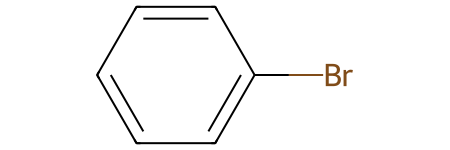

In [97]:
mol = Chem.MolFromSmiles('Brc1ccccc1')
a = list(Chem.rdmolfiles.CanonicalRankAtoms(mol, breakTies=False))
rid = [3]

'''
for each rid:
    go to the index in the rank
    if more atoms with same rank -> add to rids
'''


topological_rid_indices = []
# for i, each in enumerate(a):
for r in rid:
    get = a[r]
    topological_rid_indices = find_indices(a, get)
    print(topological_rid_indices)
    topological_rid_indices.pop(topological_rid_indices.index(r))
    print(topological_rid_indices)

print(a, rid)
rid.extend(topological_rid_indices)
print(rid)
Xenopict(mol).mark_atoms(rid)

In [75]:
it = 'Brc1ccccc1'
rid = [3]
ridd = 3
riddd = [2,3]

def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)

    return indices

def check_for_topological_equivalence(mol, rids):
    topological_rid_indices = []

    canonical_rank = list(Chem.rdmolfiles.CanonicalRankAtoms(mol, breakTies=False))

    for r in rids:
        get = canonical_rank[r]
        
        topological_rid_indices.extend(find_indices(canonical_rank, get))

    # rids.extend(topological_rid_indices)

    return topological_rid_indices

def check_for_topological_equivalence_one(mol, rid):
    topological_rid_indices = []

    canonical_rank = list(Chem.rdmolfiles.CanonicalRankAtoms(mol, breakTies=False))

    get = canonical_rank[rid]

    topological_rid_indices.extend(find_indices(canonical_rank, get))

    return topological_rid_indices[1:]

def multi_check(mol,rid_list):
    out = []
    for each in rid_list:
        out.extend(check_for_topological_equivalence_one(mol, each))

    return out

add = multi_check(Chem.MolFromSmiles(it), riddd)
add

# Xenopict(it).mark_atoms(rid), Xenopict(it).mark_atoms(add) 

[2, 6, 3, 5]

In [76]:
with smart_open.open("propogated_reactive_ids.pkl.gz", 'rb') as f:
    prid = pickle.load(f)

with smart_open.open("topological_propogated_reactive_ids.pkl.gz", 'rb') as f:
    tprid = pickle.load(f)

In [77]:
# Creates a dataframe showing the lineage of a mol rid starting from level 0
# Creates a sample graph of the lineage in the form of an html file
def display_rid_family_line(graph, propogated_rids, mol):
    df = pd.DataFrame(columns=['mol', 'mol image','rids', 'levels'])

    ag = list(ancestor_generations(graph, mol).items())

    for key, value in ag:
        for v in value:
            df.loc[len(df)] = [v, Xenopict(v).mark_atoms(propogated_rids[mol][v]['rids']), propogated_rids[mol][v]['rids'], propogated_rids[mol][v]['levels']]

    return df

def get_children(graph, mol):
    return list(AMD.graph.successors(mol))

parent = 'O=C1C=CC(Br)=CC1=O'
# parent = 'c1ccccc1'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)
# out[0].show('mygraph.html')
# display(out.style, tout.style)
tout.style
# get_children(AMD.graph, 'c1ccccc1')

In [54]:
parent = 'c1ccccc1'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)

# display(out.style, tout.style)
tout.style

In [78]:
parent = 'O=C1NCC(=CCBr)C(=O)N1'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)

# display(out.style, tout.style)
tout.style

In [79]:
parent = 'C#N'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)

# display(out.style, tout.style)
tout.style

In [82]:
parent = 'CC(N)CC1=CC(=O)C(=O)C=C1'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)

# display(out.style, tout.style)
out.style

In [ ]:
parent = 'O=C1C=CC(Br)=CC1=O'

out = display_rid_family_line(AMD.graph, prid, parent)
tout = display_rid_family_line(AMD.graph, tprid, parent)

display(out.style, tout.style)

In [202]:
get_children(AMD.graph, 'c1ccccc1')

['*Oc1ccc(O)cc1',
 '*OP(=O)(O)OC1CC(n2cnc3c(=O)[nH]c(Nc4ccc(O)cc4)nc32)OC1CO',
 'CC(=O)NC(CSc1ccccc1O)C(=O)O',
 '*n1c[n+](-c2ccccc2)c2c(=O)[nH]c(N)nc21',
 '*C1C=CC=CC1O',
 'NC(CSc1cc(O)ccc1O)C(=O)O',
 'Oc1ccc(O)cc1',
 'O=C(O)C1OC(Oc2ccc(O)c(O)c2)C(O)C(O)C1O',
 'O=C1C=CC(=O)C2OC12',
 '*SC1C=CC=CC1O',
 '*Oc1ccccc1O',
 'O=C1C=CC=CC1=O',
 'O=S(=O)(O)Oc1ccc(O)cc1O',
 'NC(CCC(=O)NC(CSC1C=CC=CC1O)C(=O)NCC(=O)O)C(=O)O',
 '*Oc1ccccc1',
 'c1ccc(-c2ccccc2)cc1',
 'O=[N+]([O-])c1ccccc1-c1ccccc1',
 '*Sc1cccc(O)c1O',
 '*C(=O)C(N)CSC1C=CC=CC1O',
 'CC(=O)NC(CSc1cc(O)ccc1O)C(=O)O',
 'CC(=O)NC(Sc1ccccc1)C(=O)O',
 'NC(CSc1cc(O)ccc1O)C(=O)NCC(=O)O',
 'O=Cc1ccccc1',
 'O=[N+]([O-])c1ccc(-c2ccccc2)cc1',
 '*Oc1ccc(O)c(O)c1',
 'Oc1ccccc1-c1ccccc1O',
 '*C(=O)C(N)CSc1cc(O)ccc1O',
 'O=C(O)C=CC=CC(=O)O',
 'Oc1ccccc1O',
 'O=S(=O)(O)Oc1ccc(O)cc1',
 'C1=CC2OC2C=C1',
 'O=S(=O)(O)Oc1ccccc1O',
 '*c1cc(O)ccc1O',
 'O=[N+]([O-])c1ccc(O)cc1',
 'O=CC=CC=CC(=O)O',
 '*c1ccccc1',
 'C1=CC2OOC2C=C1',
 'O=C(O)C1OC(Oc2ccccc2)C(O)C(O)C1O',
 '*Sc1cc(O)ccc1O',
 'CC(=O)NC(CSC1C=CC=CC1O)C(=O)O',
 'CC(=O)NC(CSc1ccccc1)C(=O)O',
 '*C(=O)C(N)CSc1ccccc1',
 '*OC1C=CC=CC1O',
 'O=C1C=CC(=O)C=C1',
 '*Sc1ccccc1',
 'O=S(=O)(O)Oc1ccc(O)c(O)c1',
 'O=[N+]([O-])c1ccccc1',
 'O=C=O',
 'COc1cccc(OC)c1O',
 'c1ccc(-c2ccc(-c3ccccc3)cc2)cc1',
 'O=[N+]([O-])c1cccc(-c2ccccc2)c1',
 'COc1cccc(O)c1',
 'C1=CC=COC=C1',
 '*C(=O)C(N)CSC1=CC(=O)C=CC1=O',
 'NC(CCC(=O)NC(CSc1ccccc1)C(=O)NCC(=O)O)C(=O)O',
 'O=[N+]([O-])c1ccccc1O',
 '[O]c1ccc(O)cc1',
 'Nc1ccccc1',
 'O=CC=CC=CCO',
 'O=CC=CC=CC=O',
 'Nc1ncn(-c2ccc(O)c(O)c2)c2ncnc1-2',
 'Cc1ccccc1',
 'O=C(O)C=CC=CCO',
 'O=C(O)C1OC(Oc2ccc(O)cc2)C(O)C(O)C1O',
 '*C(=O)C(N)CSc1ccccc1O',
 'O=C(O)c1ccccc1',
 'O=C(O)C1OC(Oc2ccccc2O)C(O)C(O)C1O',
 'OC1C=CC=CC1O',
 'O=CC=CC=C(O)C=O',
 '*C(=O)C(N)CSc1ccc(O)cc1',
 'O=[N+]([O-])c1cccc(O)c1',
 'Oc1ccccc1',
 'O=S(=O)(O)Oc1ccccc1',
 'Oc1ccc(O)c(O)c1',
 '*C(=O)C(N)CSC1=CC=CC(=O)C1=O',
 'COc1ccccc1O',
 'NC(CCC(=O)NC(CSc1cc(O)ccc1O)C(=O)NCC(=O)O)C(=O)O']

In [21]:
for each in prid:
    print(each)
    print(prid[each])
    print('----------------------------------')

O=C(Br)C(F)(F)F
{'O=C(Br)C(F)(F)F': {'rids': [1], 'levels': [0]}, 'FC(F)(F)C(Cl)Br': {'rids': [4], 'levels': [1]}}
----------------------------------
CC(C)C(Br)C(=O)NC(N)=O
{'CC(C)C(Br)C(=O)NC(N)=O': {'rids': [3], 'levels': [0]}}
----------------------------------
CC(C)C(Br)C(=O)O
{'CC(C)C(Br)C(=O)O': {'rids': [3], 'levels': [0]}, 'CC(C)C(Br)C(=O)NC(N)=O': {'rids': [3], 'levels': [1]}}
----------------------------------
BrC1=CC(Br)=C(Oc2cc(Br)c(Br)cc2Br)C2OC12
{'BrC1=CC(Br)=C(Oc2cc(Br)c(Br)cc2Br)C2OC12': {'rids': [16, 18], 'levels': [0, 0]}, 'Brc1ccc(Oc2cc(Br)c(Br)cc2Br)c(Br)c1': {'rids': [3, 2], 'levels': [1, 1]}}
----------------------------------
BrC1=CC(Br)=C(Oc2ccc(Br)cc2Br)C2OC12
{'BrC1=CC(Br)=C(Oc2ccc(Br)cc2Br)C2OC12': {'rids': [15, 9], 'levels': [0, 0]}, 'Brc1ccc(Oc2ccc(Br)cc2Br)c(Br)c1': {'rids': [3, 8], 'levels': [1, 1]}, 'Brc1ccc(Oc2cc(Br)c(Br)cc2Br)c(Br)c1': {'rids': [3, 8], 'levels': [2, 2]}}
----------------------------------
O=C1C=CC(Br)=CC1=O
{'O=C1C=CC(Br)=CC1=O': {'ri

In [9]:
out = display_rid_family_line(AMD.graph, prid, 'O=C(Br)C(F)(F)F')
out[1].style

# Topological equivalence

In [10]:
# Topological equivalence
out = display_rid_family_line(AMD.graph, prid, 'O=C1C=CC(Br)=CC1=O')
out[1].style

In [11]:
out = display_rid_family_line(AMD.graph, prid, 'O=C1NCC(=CCBr)C(=O)N1')
out[1].style


In [12]:
out = display_rid_family_line(AMD.graph, prid, 'C#CC1(O)CCC2C3CCC4=CC(=O)C(=O)C=C4C3CCC21C')
out[1].style

In [13]:
out = display_rid_family_line(AMD.graph, prid, 'C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C')
out[1].style

In [14]:
out = display_rid_family_line(AMD.graph, prid, 'C#N')
out[1].style

In [90]:
out = display_rid_family_line(AMD.graph, tprid, 'C=C1C=CC=CC1=Nc1c(Cl)cccc1Cl')
out.style

In [16]:
out = display_rid_family_line(AMD.graph, prid, 'CC(=O)N(OS(=O)(=O)O)c1ccc2c(c1)Cc1ccccc1-2')
out[1].style

In [17]:
out = display_rid_family_line(AMD.graph, prid, 'CC(N)CC1=CC(=O)C(=O)C=C1')
out[1].style

In [18]:
out = display_rid_family_line(AMD.graph, prid, 'CC(N)Cc1ccc(O)c(O)c1')
out[1].style

In [19]:
out = display_rid_family_line(AMD.graph, prid, 'CC12CCc3c(ccc4c(O)c(O)ccc34)C1CCC2=O')
out[1].style

In [20]:
out = display_rid_family_line(AMD.graph, prid, 'CC=CC=O')
out[1].style

In [206]:
with smart_open.open("AMD_network_with_propogated_rids.pkl.gz", 'rb') as f:
    netx = pickle.load(f)

AMD = copy.deepcopy(netx)

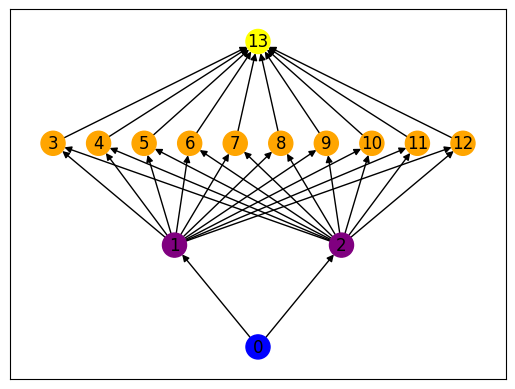

In [183]:
import networkx as nx
import matplotlib.pyplot as plt

# test_mol = 'C=C1C=CC=CC1=Nc1c(Cl)cccc1Cl'
test_mol = 'CC(N)CC1=CC(=O)C(=O)C=C1'

def display_rid_family_line_graph(graph, mol): 
    G = nx.DiGraph()
    cmap = []
    pos=[]

    ag = list(ancestor_generations(graph, mol).items())
    
    for key, value in ag:
        # print(key/len(ag) + ((key/len(ag))/2))
        for y,v in enumerate(value):
            # print(float(y/len(value)))

            if key == 0:
                cmap.append('blue')
            elif key == 1:
                cmap.append('purple')
            elif key == 2:
                cmap.append('orange')
            else:
                cmap.append('yellow')

            # print((y+1)/(len(value)+1))
            # pos.append((y/len(value) + (y/len(ag))/2, key/len(ag) + ((key/len(ag))/2)))
            pos.append(((y+1)/(len(value)+1) , key/len(ag) + ((key/len(ag))/2)))

            G.add_node(v)

    for i, add in enumerate(ag):
        for a in add[1]:
            if i+1 < len(ag):
                for b in ag[i+1][1]:
                    G.add_edge(a,b)


    return G, cmap, pos

data = display_rid_family_line_graph(AMD, test_mol)

G = data[0]
G = nx.convert_node_labels_to_integers(G, label_attribute='canonical_smiles')
# nx.draw_networkx(G, with_labels=True)
# nx.draw_networkx(G, with_labels=True, node_color=data[1])
nx.draw_networkx(G, pos=data[2], with_labels=True, node_color=data[1])

# val_map = {0: 'orange', 1: 'blue', 2: 'purple',3: 'green'}

# pos = nx.spring_layout(G)
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, node_color = val_map)

# values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
# red_edges = [('A', 'C'), ('E', 'C')]
# edge_colours = ['black' if not edge in red_edges else 'red'
#                 for edge in G.edges()]
# black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, arrows=True)
# nx.draw_networkx_edges(G, pos, arrows=False)
# plt.show()

'''
ELK java

Double check for connnections within same level
'''

In [194]:
with smart_open.open("topological_propogated_reactive_ids.pkl.gz", 'rb') as f:
    tprid = pickle.load(f)

tprid['O=C(Br)C(F)(F)F']

{'O=C(Br)C(F)(F)F': {'rids': [1], 'levels': [0]},
 'FC(F)(F)C(Cl)Br': {'rids': [4], 'levels': [1]}}

In [260]:
len(SOMS['data'])

1301

In [259]:
datafile = '/tuple_dataset.csv'
# datafile = '"topological_propogated_reactive_ids.pkl.gz"'

def dataset_iter(file):
    with open(file) as f:
        SOMS = ujson.load(f)

    for data in SOMS['data']:
        smiles = data['smiles']
        rids = list(data['rid'])
        lvls = data['level']

        levels = defaultdict(list)
        for i,a in enumerate(rids):
            levels[a].append(lvls[i])

        yield smiles, rids, dict(levels)

count = 0
for smi, reactive_idxs, levels in dataset_iter(datafile):
    print(count, ': ', smi, reactive_idxs, levels)

    count += 1

0 :  O=C(Br)C(F)(F)F [1] {1: [0]}
1 :  CC(C)C(Br)C(=O)NC(N)=O [3] {3: [0]}
2 :  CC(C)C(Br)C(=O)O [3] {3: [0]}
3 :  BrC1=CC(Br)=C(Oc2cc(Br)c(Br)cc2Br)C2OC12 [16, 18] {16: [0], 18: [0]}
4 :  BrC1=CC(Br)=C(Oc2ccc(Br)cc2Br)C2OC12 [15, 9] {15: [0], 9: [0]}
5 :  O=C1C=CC(Br)=CC1=O [2] {2: [0]}
6 :  BrC1=CC2OC2C=C1 [5] {5: [0]}
7 :  FC(F)=CBr [1] {1: [0]}
8 :  N#CCBr [2] {2: [0]}
9 :  C=C(Br)CBr [3] {3: [0]}
10 :  O=C(CBr)CBr [4] {4: [0]}
11 :  O=C(CBr)N1CC([N+](=O)[O-])([N+](=O)[O-])C1 [2] {2: [0]}
12 :  O=C(CBr)c1ccccc1 [2] {2: [0]}
13 :  CC(Br)CBr [1, 0] {1: [0], 0: [0]}
14 :  BrCC(Br)c1ccccc1 [1, 2] {1: [0], 2: [0]}
15 :  OC(CBr)c1ccccc1 [2] {2: [0]}
16 :  O=C1NCC(=CCBr)C(=O)N1 [3] {3: [0]}
17 :  O=CCBr [2] {2: [0]}
18 :  BrCCBr [2] {2: [0]}
19 :  BrCCCBr [3] {3: [0]}
20 :  BrCCCCBr [4] {4: [0]}
21 :  Cn1c(COP(=O)(NCCBr)NCCBr)cnc1[N+](=O)[O-] [13] {13: [0]}
22 :  NC(CCC(=O)NC(CSCCBr)C(=O)NCC(=O)O)C(=O)O [11] {11: [0]}
23 :  O=[N+]([O-])c1ccc(CCBr)cc1 [8] {8: [0]}
24 :  Cc1c(C)n2c(CBr)c(C)

In [256]:
def dataset_iter(f):
    for index, row in pd.read_csv(f, sep='\t', header=None).iterrows():
        r0 = row[0]
        r1 = row[1]

        reactive_idxs = set(x[0] for x in ast.literal_eval(r1))

        levels = {}
        [levels.update({x[0]: [x[1]]}) if x[0] not in levels else levels[x[0]].append(x[1]) for x in ast.literal_eval(r1)]

        yield r0, reactive_idxs, levels

count = 0
for smi, reactive_idxs, levels in dataset_iter(datafile):
    print(count, ': ', smi, reactive_idxs, levels)

    count += 1

0 :  O=C(Br)C(F)(F)F {1} {1: [0]}
1 :  CC(C)C(Br)C(=O)NC(N)=O {1} {1: [0, 1]}
2 :  CC(C)C(Br)C(=O)O {1} {1: [0]}
3 :  BrC1=CC(Br)=C(Oc2cc(Br)c(Br)cc2Br)C2OC12 {5, 6} {5: [0], 6: [0]}
4 :  BrC1=CC(Br)=C(Oc2ccc(Br)cc2Br)C2OC12 {11, 5} {11: [0], 5: [0]}
5 :  O=C1C=CC(Br)=CC1=O {7} {7: [0]}
6 :  BrC1=CC2OC2C=C1 {4} {4: [0]}
7 :  FC(F)=CBr {2} {2: [0]}
8 :  N#CCBr {1} {1: [0]}
9 :  C=C(Br)CBr {1} {1: [0]}
10 :  O=C(CBr)CBr {4} {4: [0]}
11 :  O=C(CBr)N1CC([N+](=O)[O-])([N+](=O)[O-])C1 {1} {1: [0]}
12 :  O=C(CBr)c1ccccc1 {1} {1: [0]}
13 :  CC(Br)CBr {0, 2, 4} {0: [1], 2: [0], 4: [0]}
14 :  BrCC(Br)c1ccccc1 {1, 2} {1: [0], 2: [0, 1]}
15 :  OC(CBr)c1ccccc1 {1} {1: [0]}
16 :  O=C1NCC(=CCBr)C(=O)N1 {4} {4: [0]}
17 :  O=CCBr {1} {1: [0]}
18 :  BrCCBr {2} {2: [0, 1]}
19 :  BrCCCBr {3} {3: [0]}
20 :  BrCCCCBr {4} {4: [0]}
21 :  Cn1c(COP(=O)(NCCBr)NCCBr)cnc1[N+](=O)[O-] {8, 4} {4: [1], 8: [0]}
22 :  NC(CCC(=O)NC(CSCCBr)C(=O)NCC(=O)O)C(=O)O {1} {1: [0]}
23 :  O=[N+]([O-])c1ccc(CCBr)cc1 {1} {1: [0]}
24